# AiDM 2019 Group 26: Assignment 3: Structure of Wikipedia Links


## Part 3: Implement PageRank algorithm (sparse)

Auke Bruinsma, s1594443 and Simon van Wageningen, s2317079.

**Instructions slide 24**:

- Store both $M$ (as a sparse matrix) and $v$ (in RAM).
- Run 25 iterations of the 'classical' update rule from slide 10, with $\beta = 0.8$.
- Plot the MSE of the differences (25 numbers): $v$ - $MV$
- Assume that your computer has 1GM RAM and the average out-degree of a graph $G$ is $15$.

### 1. Imports.

In [1]:
# Packages.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse import csc_matrix

In [2]:
# Datasets
data = pd.read_csv("preprocessed_data.csv",sep = ",",)

### 2. Create the transition matrix $M$ and pagerank vector $v$.

In [3]:
M_ones = csc_matrix((np.ones(len(data)),(data['page_id_to'],data['page_id_from']))) # Transition matrix with 1's.
c = np.reshape(np.asarray(M_ones.sum(axis=0)),np.shape(M_ones)[0]) # Find the sum so that you can divide columns.
c[c==0]=1 # So you do not divide by zero but the column stays the same.
M = M_ones.multiply(1/c) # Divide columns by the sum of the columns (equal weights).
v = np.full(shape=np.shape(M)[1],fill_value=1/np.shape(M)[1]) # Initialise page vector v.

### 3. Classical Pagerank Algorithm.

In [4]:
# Function that performs the classical pagerank algorithm.
def classical_pagerank(M,v,beta,iterations):
    n = np.shape(M)[1]
    e = np.ones(n)
    
    MSE = [] # The errors of each iterations will be appended to this array.
    for i in range(iterations):
        v = beta*M.dot(v)+(1-beta)*(e/n) # Formula from slide 10.
        MSE.append(np.mean(np.power(v-M.dot(v),2))) # Compute the mean squared error of the difference. 
    
    return MSE

In [5]:
# Run the algorithm with correct parameter values.
beta = 0.8
iterations = 25

MSE = classical_pagerank(M,v,beta,iterations)

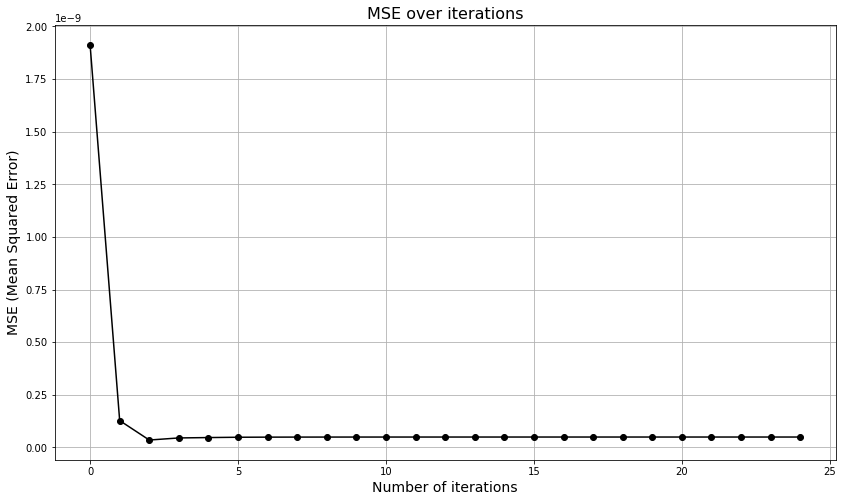

In [6]:
# Plot the error over iterations.
plt.figure(figsize=(14,8))
plt.plot(np.arange(0,len(MSE)),MSE,'-o',c='k')
plt.title('MSE over iterations',fontsize=16)
plt.xlabel('Number of iterations',fontsize=14)
plt.ylabel('MSE (Mean Squared Error)',fontsize=14)
plt.grid()
plt.show()
plt.close()

**Caption**: As you can see, the error quickly converges to somewhere around $3$, and after approximately 8 iterations there's no significant improvement.

**Question**: Assume that your computer has 1GB RAM and the average out-degree of a graph $G$ is $15$. What is the maximal number of nodes of $G$ such that your algorithm could be executed on your computer?

**Answer**: Each marix element is 64 bits or 8 bytes. Since each matrix element represents an edge, each connection between two pages is 8 bytes. The average out-degree of a graph $G$ is 15, so each graph equals $15 \cdot 8 = 120$ bytes. The maximum number of nodes of $G$ can then be computed in the following way:

$$ \frac{1 \text{ GB } * 1024^{2}}{120 \text{ bytes}} \approx 8.738 \text{ nodes}$$